In [1]:
%matplotlib inline

In [2]:
from math import exp, log
import random

# Module 13 - Programming Assignment

## Directions

1. Change the name of this file to be your JHED id as in `jsmith299.ipynb`. Because sure you use your JHED ID (it's made out of your name and not your student id which is just letters and numbers).
2. Make sure the notebook you submit is cleanly and fully executed. I do not grade unexecuted notebooks.
3. Submit your notebook back in Blackboard where you downloaded this file.

*Provide the output **exactly** as requested*

# The Problem

When we last left our agent in Module 4, it was wandering around a world filled with plains, forests, swamps, hills and mountains. This presupposes a map with known terrain:

```
......
...**.
...***
..^...
..~^..
```

but what if all we know is that we have some area of interest, that we've reduced to a GPS grid:

```
??????
??????
??????
??????
??????
```

and the agent has to determine what kind of terrain is to the left, front and right of it?

Assuming the agent has a very simple visual sensor that constructs a 4x4 grayscale image for each of the three directions, it might it could see something like this:

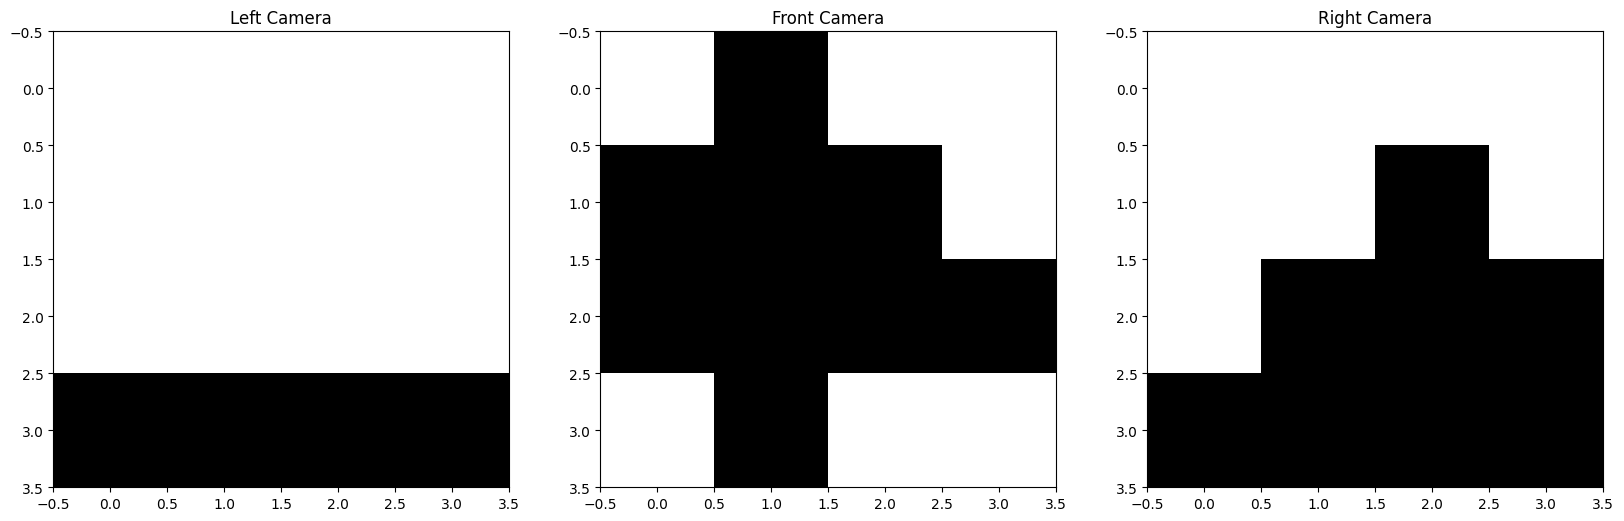

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

plain =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 1.0, 1.0, 1.0]
forest = [0.0, 1.0, 0.0, 0.0,1.0, 1.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0,0.0, 1.0, 0.0, 0.0]
hills =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 1.0, 0.0,0.0, 1.0, 1.0, 1.0,1.0, 1.0, 1.0, 1.0]
swamp =  [0.0, 0.0, 0.0, 0.0,0.0, 0.0, 0.0, 0.0,1.0, 0.0, 1.0, 0.0,1.0, 1.0, 1.0, 1.0]

figure = plt.figure(figsize=(20,6))

axes = figure.add_subplot(1, 3, 1)
pixels = np.array([255 - p * 255 for p in plain], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Left Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 2)
pixels = np.array([255 - p * 255 for p in forest], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Front Camera")
axes.imshow(pixels, cmap='gray')

axes = figure.add_subplot(1, 3, 3)
pixels = np.array([255 - p * 255 for p in hills], dtype='uint8')
pixels = pixels.reshape((4, 4))
axes.set_title( "Right Camera")
axes.imshow(pixels, cmap='gray')

plt.show()
plt.close()

which would be plains, forest and hills respectively.


## The Assignment

In Assignment 12, we applied a logistic regression to determine if something was "hills" or "not hills". For this programming assignment your task is to write an artificial neural network that determines what kind of terrain it is. This is a multi-class problem.

For a starting point, you can refer to Pseudocode and the Self-Check.

## Data

As before, we have clean examples of the different types of terrain but based on the location, the registration can be a bit off for some of the types and the visual sensor is often blurry.

Here are the clean examples with different registrations: 

In [4]:
clean_data = {
    "plains": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, "plains"]
    ],
    "forest": [
        [0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, "forest"],
        [1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, "forest"],
        [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, "forest"]
    ],
    "hills": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, "hills"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, "hills"]
    ],
    "swamp": [
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, "swamp"],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, "swamp"]        
    ]
}

Let's create a function that allows us to view any of these:

In [5]:
def view_sensor_image( data):
    figure = plt.figure(figsize=(4,4))
    axes = figure.add_subplot(1, 1, 1)
    pixels = np.array([255 - p * 255 for p in data[:-1]], dtype='uint8')
    pixels = pixels.reshape((4, 4))
    axes.set_title( "Left Camera:" + data[-1])
    axes.imshow(pixels, cmap='gray')
    plt.show()
    plt.close()

"I think that I shall never see a thing so lovely as a tree."

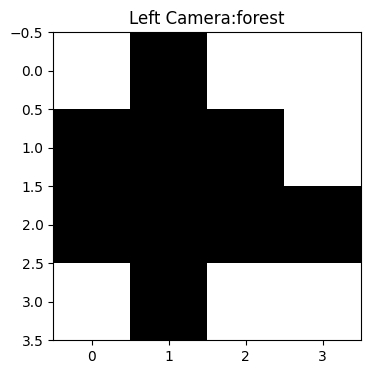

In [6]:
view_sensor_image( clean_data[ "forest"][0])

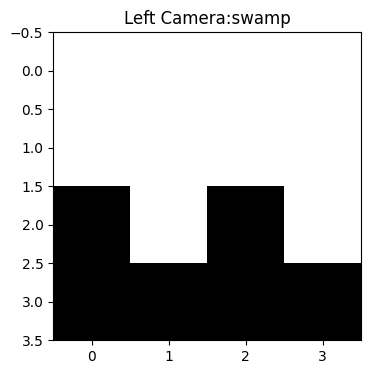

In [7]:
view_sensor_image( clean_data["swamp"][0])

The data that comes in, however, is noisy. The values are never exactly 0 and 1. In order to mimic this we need a `blur` function.

We will assume that noise is normally distributed. For values that should be 0, the noisy values are distributed $N(0.10, 0.05)$. For values should be 1, the noisy values are distributed $N(0.9, 0.10)$.

In [8]:
def blur( data):
    def apply_noise( value):
        if value < 0.5:
            v = random.gauss( 0.10, 0.05)
            if v < 0.0:
                return 0.0
            if v > 0.75:
                return 0.75
            return v
        else:
            v = random.gauss( 0.90, 0.10)
            if v < 0.25:
                return 0.25
            if v > 1.00:
                return 1.00
            return v
    noisy_readings = [apply_noise( v) for v in data[0:-1]]
    return noisy_readings + [data[-1]]

We can see how this affects what the agent *actually* sees.

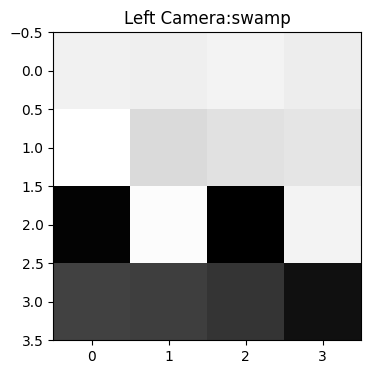

In [9]:
view_sensor_image( blur( clean_data["swamp"][0]))

You are going to want to write four (4) functions:

1. `generate_data`
2. `learn_model`
3. `apply_model`

### `generate_data`

With the clean examples and the `blur` function, we have an unlimited amount of data for training and testing our classifier, an ANN that determines if a sensor image is hills, swamp, forest or plains.

In classification, there is a general problem called the "unbalanced class problem". In general, we want our training data to have the same number of classes for each class. This means you should probably generate training data with, say, 100 of each type.

But what do we do about the class label with the neural network?

In this case, we can do "one hot". Instead of `generate_data` outputing a single 0 or 1, it should output a vector of 0's and 1's so that $y$ is now a vector as well as $x$. We can use the first position for hill, the second for swamp, the third for forest and the fourth for plains:

```
[0, 1, 0, 0]
```

what am I? swamp.

Unlike logistic regression, you should set the *biases* inside the neural network (the implict $x_0$ = 1) because there are going to be lot of them (one for every hidden and output node).

`generate_data` now only needs to take how many you want of each class:

`generate_data( clean_data, 100)`

generates 100 hills, 100 swamp, 100 forest, 100 plains and transforms $y$ into the respective "one hot" encoding. You can use the code from Module 12 as a starting point.

### `learn_model`

`learn_model` is the function that takes in training data and actually learns the ANN. If you're up to it, you can implement a vectorized version using Numpy but you might start with the loopy version first.

*In the lecture, I mentioned that you usually should mean normalize your data but you don't need to do that in this case because the data is already on the range 0-1.*

You should add a parameter to indicate how many nodes the hidden layer should have.

When verbose is True, you should print out the error so you can see that it is getting smaller.

When developing your algorithm, you need to watch the error so you'll set verbose=True to start. You should print it out every iteration and make sure it is declining. You'll have to experiment with both epsilon and alpha; and it doesn't hurt to make alpha adaptive (if the error increases, make alpha = alpha / 10).

When you know that your algorithm is working, change your code so that the error is printed out only every 1,000 iterations (it takes a lot of iterations for this problem to converge, depending on your parameter values--start early).

`learn_model` returns the neural network. The hidden layer will be one vector of thetas for each hidden node. And the output layer will have its own thetas, one for each output (4 in this case). Return it as a Tuple: (List of List, List of List).

### `apply_model`

`apply_model` takes the ANN (the model) and either labeled or unlabeled data. If the data is unlabeled, it will return predictions for each observation as a List of Tuples of the inferred value (0 or 1) and the actual probability (so something like (1, 0.73) or (0, 0.19) so you have [(0, 0.30), (1, 0.98), (0, 0.87), (0, 0.12)]. Note that unlike the logistic regression, the threshold for 1 is not 0.5 but which value is largest (0.98 in this case).

If the data is labeled, you will return a List of List of Tuples of the actual value (0 or 1) and the predicted value (0 or 1). For a single data point, you'll have the pairs of actual values [(0, 1), (0, 0), (0, 0), (1, 0)] is a misclassification and [(0, 0), (0, 0), (1, 1), (0, 0)] will be a correct classification. Then you have a List of *those*, one for each observation.

###  simple evaluation

We have an "unlimited" supply of data so we'll just generate a training set and then a test set and see how well our neural network does. Use the error rate (incorrect classifications/total examples) for your evaluation metric. We'll learn about more sophisticated 

1. generate training set (how many do you think you need?)
2. generate test set (how many is a good "test" of the network you built?)
3. loop over [2, 4, 8] hidden nodes:
    1. train model and apply to train data, calculate error rate.
    2. apply to test data and calculate error rate.
    3. print error rate
    
Which number of hidden nodes did best?

**As always when working with Lists or Lists of Lists, be very careful when you are modifying these items in place that this is what you intend (you may want to make a copy first)**

---

Put your helper functions above here.

## Main Functions

<a id="one_hot"></a>
## one_hot

- Performs one hot encoding
- Converts string into a list of binary representation

* **label** str: label value


**returns** List: one hot encoding

In [10]:
def one_hot(label:str)->list:
    if label == "hills":
        return [1,0,0,0]
    elif label == "swamp":
        return [0,1,0,0]
    elif label == "forest":
        return [0,0,1,0]
    elif label == "plains":
        return [0,0,0,1]
    else:
        print("Incorrect key. Not able to encode")
        return []

In [11]:
#check will return correct encoding for swamp
assert one_hot("swamp") == [0,1,0,0]

#check will return correct encoding for plains
assert one_hot("plains") == [0,0,0,1]

#verify invalid string returns an empty list
assert one_hot("plain") == []

Incorrect key. Not able to encode


### generate_data

Generates an endless supply of blurred data from a collection of terrain prototypes.

* `data`: Dict[Str, List[Any]] - a Dictionary of "clean" prototypes for each landscape type.
* `n`: Int - the number of blurred examples of each terrain type to return.

returns

* List[List[Any]] - a List of Lists. Each individual List is a blurred example of a terrain type, generated from the prototype.

In [12]:
def generate_data(data, n):
    labels = list(data.keys())
    result = []

    for key_label in labels:
        count = 1
        while count <= n:
            datum = blur(random.choice(data[key_label]))
            xs = datum[0:-1] # ignore label col
            y = one_hot(datum[-1])
            xs.append(y) # add encoding
            result.append(xs)
            count +=1

    random.shuffle(result)
    
    return result

In [13]:
check_gen_data = generate_data(clean_data, 2)

#verify the size is 4 * N
assert len(check_gen_data) == 4*2

#verify encoding is the last value in each list
for d in check_gen_data:
    assert d[-1] in [[0,0,0,1], [0,0,1,0], [0,1,0,0],[1,0,0,0]]
    
    #verify each feature is a decimal -- blurred was called
    for f in d[:-1]:
        assert isinstance(f,float)

<a id="get_thetas"></a>
## get_thetas

- creates thetas based on the shape provided. 
- Thetas are random floats between 0 and 1

* **inputs** int: number of inputs
* **nodes** int: number of nodes/outputs

**returns** List: list of weights/thetas

In [14]:
def get_thetas(inputs:int,nodes:int)->list[list]:
    layer_thetas = []
    for i in range(nodes):
        thetas = [random.random() for f in range(inputs)]
        layer_thetas.append(thetas)
    return layer_thetas

In [15]:
obs= [[.52,-.97,1]]
check_hidden = get_thetas(len(obs[0]), 3)

#verify 3 hidden layers thetas exists
assert len(check_hidden) == 3
#verify each hidden layer thetas is 3 
for h in check_hidden:
    assert len(h) == 3

# check output layer
y = [0,1]
check_out = get_thetas(len(check_hidden) + 1,len(y) )

#check has 2 output thetas
assert len(check_out) == 2
for o in check_out:
    assert len(o) == 4

<a id="linear"></a>
## linear

- Returns a list of linear predictions
- y-hat = theta0*x0 + theta1*x1 + .. + thetaN*xN
- From Mod 12 but with adjustments to only look at one ob instead of all data

* **xs** list: list of observations for one point
* **thetas** list[floats]: list of thetas for each feature



**returns** y_hat: predicted labels using a linear function

In [16]:
def linear(xs:list, thetas:list)->list:
    
    if len(xs) != len(thetas):
        print("Something went wrong. Features vs thetas doesnt match")
        return None
    
    else:
        y_hat = 0
        for feature in range(len(xs)):
                y_hat += xs[feature] * thetas[feature]
    return y_hat

In [17]:
#verify empty list is returned if empty lists are passed
empty_check = linear([], [1.3,2.9])
assert empty_check == None

#verify number of observation and thetas returns an empty list
diff_size = linear([1], [1,2])
assert diff_size == None

#verify self check linear problems match
self_check_linear = linear([.5,.2,1], [.5,.5,.5])
assert round(self_check_linear,2) == .85


Something went wrong. Features vs thetas doesnt match
Something went wrong. Features vs thetas doesnt match


<a id="sigmoid"></a>
## sigmoid

- Returns a prediction using sigmoid function
- y-hat = 1/ (1 + e(-1* linear_fnx))

* **theta_x** float: a linear predictions

**returns** float: predicted label using signmoid function

In [18]:
def sigmoid(theta_x:float)->float:
    return 1/ (1 + exp(-theta_x))


In [19]:
self_check_sig = sigmoid(.85)

# verify number is between 0 and 1
assert self_check_sig > 0 
assert self_check_sig < 1

assert round(self_check_sig,5) == .70057

# verify linear function can be used as parameter
sig_lin_check = sigmoid(linear([1,1.1],[.8,1.1]))
assert round(sig_lin_check,3) == .882

<a id="feed_forward"></a>
## feed_forward

- Performs feed forward of the ANN
- This is done by signoid function called for each node (hidden and output layers)

* **ob** list: list features of a single observation
* **hidden** list[list]: list of thetas for the hidden layer
* **out** list[list]: list of thetas for the output layer


**returns** dict: outputs for each layer

In [20]:
def feed_forward(ob:list, hidden:list[list], out:list[list])->dict:
    hidden_outs = [] 
    out_outs = [] 
    outs = {}
    # hidden layer
    for node_theta in hidden:
        theta_x = linear(ob, node_theta)
        y_hat = sigmoid(theta_x)
        hidden_outs.append(y_hat)
    hidden_outs.append(1) # add bias
    outs["hidden"] = hidden_outs
    
    # out layer
    for node_theta_o in out:
        theta_x_o = linear(hidden_outs, node_theta_o)
        y_hat_o = sigmoid(theta_x_o)
        out_outs.append(y_hat_o)
    outs["out"] = out_outs

    return outs

In [21]:
pres_hidden_thetas = [
    [.5,.5,.5]
    ,[.25,.15,.5]]
pres_out_thetas =    [[.75,.5,.25]
    ,[.35,.10,.25]]
ob_pres = [.5,.2,1]
pres_feed =feed_forward(ob_pres,pres_hidden_thetas,pres_out_thetas)

# verify hidden and out keys exists
assert "hidden" in pres_feed.keys()
assert "out" in pres_feed.keys()

# verify bias is in the last hidden out
assert pres_feed["hidden"][-1] == 1

# verify the values are as expected
assert round(pres_feed["hidden"][0],5) == .70057
assert round(pres_feed["hidden"][1],5) == .65814
assert round(pres_feed["out"][0],4) == .7511
assert round(pres_feed["out"][1],4) == .6367

<a id="out_gammas"></a>
## out_gammas

- Calculated the gammas for the output layer

* **y** list: list labels (one hot encoding)
* **y_hat** list: list expected value (one hot encoding)



**returns** list: list of gammas for each output layer

In [22]:
def out_gammas(y:list,y_hat:list)->list:
    gammas = []
    if len(y) != len(y_hat):
        print("Y and Y_hat sizes dont match")
        return gammas
    for i in range(len(y)):
        gamma_i = y_hat[i] * (1 - y_hat[i]) * (y[i] - y_hat[i])
        gammas.append(gamma_i)
    
    return gammas

In [23]:
y_pres = [1,0]
out_pres = [.7511, .6367]

pres_out_gammas = out_gammas(y_pres,out_pres)

# verify 2 output gammas are returned
assert len(pres_out_gammas) == len(y_pres) == 2

# verify the values are expected
assert round(pres_out_gammas[0], 4) == .0465
assert round(pres_out_gammas[1], 4) == -.1473

#verify empty list is returned is diff sized lists
assert out_gammas([3,4,5],[2,2]) == []

Y and Y_hat sizes dont match


<a id="hidden_gammas"></a>
## hidden_gammas

- Calculates the gammas for the hidden layer

* **out_gammas** list: list of gammas for the output layers
* **thetas_ho** list: list of thetas for the output layer (theta h,o)
* **y_hat** list: list of expected value (one hot encoding)


**returns** list: gammas for the hidden layer


In [24]:
def hidden_gammas(out_gammas:list, thetas_ho:list, y_hat:list)->list:
    sm = 0
    for i in range(len(out_gammas)):
        sm += out_gammas[i] * thetas_ho[i]
    y_hat_calc = y_hat * (1-y_hat)

    return y_hat_calc * sm
    

In [25]:

h1_theta_check = hidden_gammas(pres_out_gammas, [.75,.35], .70057)
# verify a signle value is returned
assert isinstance(h1_theta_check,float)
# verify h1 gamma is as expected
assert round(h1_theta_check,4) == -.0035

#verify h2 is the value expected
h2_theta_check = hidden_gammas(pres_out_gammas, [.5,.10], .65814)
assert round(h2_theta_check,4) == .0019

<a id="update_thetas"></a>
## update_thetas

- Updates the thetas from takings the current theta plus the change

* **layer_thetas** list: list of thetas for the layer only
* **inputs** list: list of inputs fed into the layer
* **gamma** list: list of gammas for the layer
* **alpha** float: alpha value

**returns** list: new thetas

In [26]:
def update_thetas(layer_thetas:list, inputs:list, gammas:list,alpha:float)->float:
    # change 
    new_thetas = []
    for o in range(len(layer_thetas)):
        o_theta = []
        for input in range(len(inputs)):
            change = alpha * gammas[o] * inputs[input]
            o_theta.append(round(layer_thetas[o][input]+ change, 4))
        new_thetas.append(o_theta)
    return new_thetas


In [27]:

pres_new_out_thetas = update_thetas(pres_out_thetas, pres_feed["hidden"], pres_out_gammas,1)
pres_new_out_thetas
# verify new theta size matches old theta size
assert len(pres_new_out_thetas) == len(pres_out_thetas)

# verify the thetas are as expected
assert pres_new_out_thetas[0] == [0.7826, 0.5306, 0.2965]
assert pres_new_out_thetas[1] == [0.2468, 0.0031, 0.1027]

#verify function returns expected result for hidden layer
pres_new_h_thetas = update_thetas(pres_hidden_thetas, ob_pres, [h1_theta_check,h2_theta_check],1)
assert pres_new_h_thetas[0] == [0.4983, 0.4993, 0.4965]
assert pres_new_h_thetas[1] == [0.2510, 0.1504, 0.5019]

<a id="backprob"></a>
## backprob

- Performs back propagation of the ANN
- This updates the thetas for each layer

* **ob** list: features of a single observation
* **outs** dict: list of outputs for each layer. Hidden and output layer
* **y** list: list of labels (one hot encoding)
* **hidden** list[list]: list of thetas for the hidden layer
* **out_layer** list[list]: list of thetas for the output layer
* **alpha** float: alpha value

**returns** list: list of updated thetas

In [28]:
def backprob(ob:list,outs:dict, y:list, hidden:list[list], out_layer:list[list], alpha:float)->list:
    out_g = out_gammas(y,outs["out"])
    h_gammas = []

    for h in range(len(hidden)):
        ho_thetas = []
        for o in out_layer:
            ho_thetas.append(o[h])
        h_gammas.append(hidden_gammas(out_g, ho_thetas, outs["hidden"][h]))

    # update thetas
    thetas = {}
    thetas["out"] = update_thetas(out_layer, outs["hidden"], out_g,alpha)
    thetas["hidden"] = update_thetas(hidden, ob, h_gammas, alpha)

    return thetas

In [29]:
pres_back_results = backprob(ob_pres,pres_feed, [1,0], pres_hidden_thetas, pres_out_thetas, 1)
#verify thetas for both out and hidden are returned
assert "out" in pres_back_results.keys()
assert "hidden" in pres_back_results.keys()

# verify hidden layer is as expected
assert pres_back_results["hidden"] == [[0.4983, 0.4993, 0.4965], [0.251, 0.1504, 0.5019]]

#verify out layer is as expected
assert pres_back_results["out"] ==[[0.7826, 0.5306, 0.2965], [0.2468, 0.0031, 0.1027]]

<a id="update_alpha"></a>
## update_alpha

- Updates alpha to be a smaller value if the error rate is increasing
- Otherwise, alpha remains the same

* **alpha** float: alpha value/learning rate
* **current_error** float: current error rate
* **prev_error** float: previous error rate


**returns** float: new alpha value

In [30]:
def update_alpha(alpha:float, current_error:float, prev_error:float)->float:

    if current_error > prev_error: # error increasing
        return alpha /10 # reduce alpha
    else:
        return alpha 

In [31]:
# verify alpha is reduced if error increases
assert update_alpha(.1, .05, .001) == .1/10

#verify alpha remains the same if error is the same
assert update_alpha(.1, .001, .001) == .1

#verify alpha remians the same if error decreases
assert update_alpha(.1, .0001, .001) == .1

<a id="calculate_error"></a>
## calculate_error

- Calculates the error for logistic regression

* **y_hat** list: list of predicted values
* **y** list: list of actual values

**returns** float: error rate

In [32]:
def calculate_error(y_hat:list, y:list)->float:
    sm = 0

    #avoid division by zero
    if len(y) == 0:
        return 0;

    for i in range(len(y)):
 
        if y_hat[i] == 0:
            sm += y[i] * log(.00001) + (1-y[i]) * log(1-y_hat[i])
        
        elif 1 - y_hat[i] == 0:
            sm += y[i] * log(y_hat[i]) + (1-y[i]) * log(1-.00001)
       
        else:
            sm += y[i] * log(y_hat[i]) + (1-y[i]) * log(1-y_hat[i])
    error = - 1 / len(y) * sm

    return error

In [33]:
#verify empty data return 0
empty_loss = calculate_error([],[])
assert empty_loss == 0

#verify self returns the expected value
self_check_loss = calculate_error([.88,.97],[0,1])
assert round(self_check_loss,3) ==  1.075

#verify error is 0 if y_hat and y are the same
same_check = calculate_error([1,1,1],[1,1,1])
assert same_check == 0

#verify error not thrown if y_hat is zero
zero_check = calculate_error([0,1,1],[1,1,1])
assert round(zero_check,3) == 3.838

<a id="error_alpha_update"></a>
## error_alpha_update

- Calculates the error of logistic regression and then updates the alpha if needed

* **ys** list[list]: list of labels (one hot encodings)
* **y_hats** list[list]: list of expected values (one hot encodings)
* **alpha** float: alpha value
* **current_error** float: current logistic regression error


**returns** Tuple[float,float]: new error and the alpha

In [34]:
def error_alpha_update(ys:list[list],y_hats:list[list], alpha:float, current_error:float)->tuple:
    y_class = [y.index(max(y)) for y in ys] # find the 1 value
    y_hat_class = []
    y_1 = [1 for y in ys] # label field
    for i in range(len(ys)):
        y_hat_class.append(y_hats[i][y_class[i]]) # pred at actual class label

    new_error = calculate_error(y_hat_class, y_1)

    alpha = update_alpha(alpha, new_error, current_error) 
    
    return new_error, alpha

In [35]:
check_ys = [[1,0], [0,1]]
check_yhats = [[.7511,.6367],[.5689,.7674]]
new_error_check, new_alpha = error_alpha_update(check_ys,check_yhats, 1, 100)
new_error_check, new_alpha

# verify error returned is a single value not a list of values
assert isinstance(new_error_check, float)

# verify alpha stays the same
assert new_alpha == 1 

# verify error is uses the class values
new_error_check2, new_alpha = error_alpha_update([[1],[1]],[[.7511],[.7674]], 1, 100)
assert new_error_check2 == new_error_check

# verify the alpha changes
new_error_check3, new_alpha3 = error_alpha_update(check_ys,check_yhats, 1, .00001)
assert new_alpha3 < 1

<a id="learn_model"></a>
## learn_model

- Creates an ANN
- Performs feed forward using sigmoid function for each node at each layer
    - only one hidden layer and one output layer
- Using back prop to update the weights. This is done one observation at a time
- NN continues to learn until error rate stops changing

* **data** list[list]: list of observations with its label
* **hidden_nodes** int: number of nodes in the hidden layer
* **verbose** boolean: for debugging. Prints the error rate when set to true

**returns** list: thetas for each layer


In [36]:
def learn_model( data:list[list], hidden_nodes:int, verbose=False)->list:
    obs = [ob[:-1] + [1] for ob in data] # adding in bias here
    y = [ob[-1] for ob in data]
    thetas = {}
    thetas["hidden"] = get_thetas(len(obs[0]), hidden_nodes)
    thetas["out"] = get_thetas(hidden_nodes + 1 ,len(y[0]))
    prev_error = 0
    current_error = alpha = iteration = 1
    while(abs(current_error - prev_error) > .0000001): # until error converges
        y_hats = []
        for i in range(len(obs)):
            node_outputs = feed_forward(obs[i], thetas["hidden"] , thetas["out"])
            thetas = backprob(obs[i],node_outputs, y[i], thetas["hidden"],thetas["out"], alpha)
            y_hats.append(node_outputs["out"])
        prev_error = current_error
        current_error, alpha = error_alpha_update(y,y_hats, alpha, prev_error)
        if verbose == True and iteration % 1000 == 0:
            print(iteration,"Iteration error rate:", current_error)
        iteration += 1
    return thetas["hidden"], thetas["out"]

In [37]:
pres_data = [[.5,.2,[1,0]],[.5,.2,[1,0]]]
pres_thetas = learn_model( pres_data, 2, False)

# verify out and hidden are returned
assert len(pres_thetas) == 2

# verify the shape of each
assert len(pres_thetas[1]) == 2 # number of output values
assert len(pres_thetas[1][0]) == 3 # number hidden nodes + bias
assert len(pres_thetas[0]) == 2 # number of hidden nodes
assert len(pres_thetas[0][0]) == 3 # number of features + bias

<a id="apply_model"></a>
## apply_model

- Makes predictions based on the model
- If labeled is true then a list of tuples is returned with y, y_hat
- If labeled is false then prediction and prediction probability is returned

* **model** list: list of thetas for each feature
* **test_data** list[list]: list of test data
* **labeled** boolean: indicator is data is labeled or not

**returns** List: list of predictions

In [38]:
def apply_model( model:list, test_data:list[list], labeled=False)->list:
    if labeled:
        y =  [ob[-1] for ob in test_data]
        obs = [ob[:-1] + [1] for ob in test_data] # adding in bias here
    else:
        obs = [ob + [1] for ob in test_data] # adding in bias here
    y_hats = []
    y_probs = []
    for ob in obs:
        y_hat = feed_forward(ob, model[0], model[1])
        y_index_class =y_hat["out"].index(max(y_hat["out"]))
        y_probs.append(y_hat["out"])
        y_hats.append( [ 1 if i == y_index_class else 0 for i in range(len(y_hat["out"]))])
    if labeled:
        results = []
        for row in range(len(y)):
                results.append([(y[row][i],y_hats[row][i] ) for i in range(len(y[row]))])
        return results
    else:
        return [ (y_hats[i], y_probs[i]) for i in range(len(y_hats))]

In [39]:
check_results = apply_model( pres_thetas, [[.5,.2,[1,0]],[.6,.1,[0,1]]], True)
check_results
# verify 2 records are returned
assert len(check_results) == 2
# verify a tuples is returned with first value being actual label
assert check_results[0][0][0] == 1
assert check_results[0][1][0] == 0
assert check_results[1][0][0] == 0
assert check_results[1][1][0] == 1
#verify the training test gets right result
assert check_results[0] == [(1,1),(0,0)]

<a id="get_error_rate"></a>
## get_error_rate

- Gets the error rate for the results

* **results** list: list actual lable and predicted labels


**returns** float: error rate

In [40]:
def get_error_rate(results:list)->float:
    incorrect = 0
    for row in results:
        for i in row:
            if i[0] != i[1]:
                incorrect +=1
                break # dont over count incorrect
    error_rate =  incorrect/ len(results)
    error_rate = error_rate * 100
    return error_rate


In [41]:
error_rate_check = get_error_rate(check_results)
# assert float is returned
assert isinstance(error_rate_check,float)

#assert correct value is returned
assert error_rate_check == 50

# check all correct classifications returns 0
assert get_error_rate([[(1,1),(0,0)],[(1,1),(0,0)],[(1,1),(0,0)]]) == 0

<a id="simple_eval"></a>
## simple_eval

- Evaulates three different ANN. 
    - One with 2 nodes, 4 nodes and 8 nodes in the hidden layer
    - The error rate is printed for each model
* **data** dict: clean data of terrains

In [42]:
def simple_eval(data:dict):
    train_data = generate_data(data, 100)
    test_data = generate_data( data, 100)
    nodes = [2, 4, 8]
    for n in nodes:
        model = learn_model( train_data, n, False)
        results = apply_model( model, test_data, True)
        print("Error rate for", n, "nodes:", get_error_rate(results))

Test out generate_data:

In [43]:
results = generate_data( clean_data, 10)
for result in results:
    print( result)

[0.20979258420808747, 0.11046379083147004, 0.07433914417995675, 0.08274752081156429, 0.19831829443668958, 0.051491009449232045, 0.09518862193475135, 0.06327462801319259, 0.06229931408819543, 0.0, 0.16507095132714666, 0.1737384945921741, 0.8912499295031078, 0.7553375489293808, 0.7969309933666746, 0.8282920819103489, [0, 0, 0, 1]]
[0.09879880740891168, 0.1396245869765276, 0.08563110492885043, 0.9538335096211115, 0.06499926201768705, 0.08342803891861923, 0.9795276554877898, 0.9855502951611166, 0.09735165513540758, 0.8683361704508776, 0.7443199612991702, 1.0, 0.15876400561521664, 0.09071231589218906, 0.09524444601161511, 0.971416778211867, [0, 0, 1, 0]]
[0.04467361237519071, 0.08846211967478697, 0.08104975483278554, 0.11104741689247846, 0.050176688825112226, 0.09717632406466697, 0.05629466840180847, 0.11265411652718714, 0.7926620076238654, 0.11994911277409784, 0.8440780557196603, 0.009732799753561006, 0.9354767636938282, 1.0, 0.8669287171491746, 0.9781085533904337, [0, 1, 0, 0]]
[0.1537009

Use `generate_data` to generate 100 blurred examples of each type (all four terrains).

In [44]:
train_data = generate_data( clean_data, 100)

Use `learn_model` to learn a ANN model for classifying sensor images as hills, swamps, plains or forest. **Set Verbose to True**

In [45]:
model = learn_model( train_data, 2, True)

1000 Iteration error rate: 0.03386558669247706
2000 Iteration error rate: 0.01777293962572062
3000 Iteration error rate: 0.012573473836717178
4000 Iteration error rate: 0.01026201294653401


Use `generate_data` to generate 100 blurred examples of each terrain and use this as your test data.

In [46]:
test_data = generate_data( clean_data, 100)

Apply the model and evaluate the results.

In [47]:
results = apply_model( model, test_data, True)
results[:10]

[[(0, 0), (1, 1), (0, 0), (0, 0)],
 [(1, 1), (0, 0), (0, 0), (0, 0)],
 [(1, 1), (0, 0), (0, 0), (0, 0)],
 [(1, 1), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (1, 1), (0, 0), (0, 0)],
 [(1, 1), (0, 0), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (1, 1)],
 [(0, 0), (1, 1), (0, 0), (0, 0)],
 [(0, 0), (0, 0), (0, 0), (1, 1)],
 [(0, 0), (1, 1), (0, 0), (0, 0)]]

print( results)

Now that you're pretty sure your algorithm works (the error rate during training is going down, and you can evaluate `apply_model` results for its error rate), you need to determine what the best number of hidden nodes is.

Try 2, 4, or 8 hidden nodes and indicate the best one. Follow the outline above under "Simple Evaluation".
In the "real world", you could 10 fold cross validation and validation curves to determine the number of hidden nodes and possibly if you needed one or two hidden layers.

In [48]:
simple_eval(clean_data)

Error rate for 2 nodes: 0.0
Error rate for 4 nodes: 0.0
Error rate for 8 nodes: 0.0


which number of hidden nodes is best? _2 (all were the same but 2 was the fastest)___

## Before You Submit...

1. Did you provide output exactly as requested?
2. Did you re-execute the entire notebook? ("Restart Kernel and Rull All Cells...")
3. If you did not complete the assignment or had difficulty please explain what gave you the most difficulty in the Markdown cell below.
4. Did you change the name of the file to `jhed_id.ipynb`?

Do not submit any other files.